## 1. data cleaning

Import Boston Marathon results from 2001 to 2017 (excluding 2013) as raw data in csv files

In [30]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.16.2
0.24.2


Since data before and after 2013 comes from different sources, I will clean them separately. Data from 2014 is a little bit from both worlds. I will also pick it our alone and put it back separately.

* Data before 2013

In [2]:
# data before 2013
file_name = '{}.csv'
df_list = []
for i in range(2001, 2013):
    df_i = pd.read_csv(file_name.format(i))
    df_i['Year'] = str(i)
    df_i.columns = [name.capitalize() for name in list(df_i.columns)]
    df_list.append(df_i)

df_part1 = pd.concat(df_list)
df_part1.head()

,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,Net,Country,Year
0,2 / 32,"Nietlispach, Franz",Zeiningen,M,43,91.37,W1,2 / 35,NaN,2 / 29,91.37,SUI,2001
1,1 / 3254,"Ndereba, Catherine",Nairobi,F,28,143.88,F1,27 / 13408,NaN,1 / 4814,143.88,KEN,2001
2,15 / 3945,"Lagat, Elijah",Nandi District,M,34,137.98,1,17 / 13408,NaN,17 / 8594,137.98,KEN,2001
3,14 / 3945,"Abera, Gezahegne",Addis Ababa,M,22,137.07,2,16 / 13408,NaN,16 / 8594,137.07,ETH,2001
4,3 / 32,"Frei, Heinz",Etziken,M,43,91.97,W2,3 / 35,NaN,3 / 29,91.97,SUI,2001


* Deal with missing values

In [3]:
# about 76 of the records of official time is '-'. Remove then as missing values
df_part1[df_part1['Official']=='-'].count()
df_part1 = df_part1[df_part1['Official'] != '-']
# remove official values = 0
df_part1 = df_part1[df_part1['Official'] != 0]
# transform the Official time to numeric values
df_part1['Official'] = pd.to_numeric(df_part1['Official'])
df_part1.describe()


,Age,Official
count,232669.000000,232669.000000
mean,40.724789,238.399149
std,10.490402,42.666971
min,18.000000,78.420000
25%,33.000000,208.780000
50%,41.000000,231.950000
75%,48.000000,262.080000
max,87.000000,478.520000


In [21]:

# df_full['Bib'].value_counts()

df_part1[df_part1['Official'] < 100]

,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,Net,Country,Year
0,2 / 32,"Nietlispach, Franz",Zeiningen,M,43,91.37,W1,2 / 35,NaN,2 / 29,91.37,SUI,2001
4,3 / 32,"Frei, Heinz",Etziken,M,43,91.97,W2,3 / 35,NaN,3 / 29,91.97,SUI,2001
7,1 / 32,"Van Dyk, Ernst F.",Stellenbosch,M,28,85.20,W3,1 / 35,NaN,1 / 29,85.20,RSA,2001
9,5 / 32,"Schabort, Krige",Cedartown,M,37,97.02,W4,5 / 35,GA,5 / 29,97.02,USA,2001
12,7 / 32,"Fairbank, Pierre",Narbonne,M,29,99.55,W5,7 / 35,NaN,7 / 29,99.55,FRA,2001
21,4 / 32,"Mendoza, Saul",Warm Springs,M,34,92.08,W8,4 / 35,GA,4 / 29,92.08,USA,2001
27,6 / 32,"Smith, Kelly W.",Vancouver,M,36,98.58,W10,6 / 35,BC,6 / 29,98.58,CAN,2001
0,1 / 38,"Van Dyk, Ernst F.",Stellenbosch,M,29,83.32,W1,1 / 44,NaN,1 / 37,83.32,RSA,2002
5,3 / 38,"Nietlispach, Franz",Zeiningen,M,44,90.13,W3,3 / 44,NaN,3 / 37,90.13,SUI,2002
8,4 / 38,"Mendoza, Saul",Wimberly,M,35,92.92,W4,4 / 44,TX,4 / 37,92.92,USA,2002


In [14]:
# about 76 of the records of official time is '-'. Remove then as missing values
df_part1[df_part1['Net']=='-'].count()
df_part1 = df_part1[df_part1['Net'] != '-']
# remove official values = 0
df_part1 = df_part1[df_part1['Net'] != 0]
# transform the Official time to numeric values
df_part1['Net'] = pd.to_numeric(df_part1['Net'])
df_part1.describe()

,Age,Official,Net
count,232661.000000,232661.000000,143380.000000
mean,40.724595,238.400399,238.315294
std,10.490353,42.658200,41.419800
min,18.000000,78.420000,78.420000
25%,33.000000,208.780000,209.530000
50%,41.000000,231.950000,232.220000
75%,48.000000,262.080000,261.520000
max,87.000000,475.320000,475.250000


* Data After 2015

In [4]:
# data after 2015
file_name = '{}.csv'
df_list = []
for i in range(2015, 2018):
    df_i = pd.read_csv(file_name.format(i))
    df_i['Year'] = str(i)
    df_i.columns = [name.capitalize() for name in list(df_i.columns)]
    df_list.append(df_i)

df_part2 = pd.concat(df_list)
df_part2 = df_part2.rename(columns={'M/f': 'Gender', 'Official time': 'Official', 'Gender': 'Genderdiv'})
df_part2.head()

,Bib,Name,Age,Gender,City,State,Country,Citizen,5k,10k,...,30k,35k,40k,Pace,Proj time,Official,Overall,Genderdiv,Division,Year
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,0:14:43,0:29:43,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,0:14:43,0:29:44,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,0:14:43,0:29:44,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015


* changing running time format

In [5]:
# note that the running time is recorded differently from the part1 of the data
columns_to_change = ['Official', 'Half']
distance_col_format = '{}k'
for i in range(5, 45, 5):
    columns_to_change.append(distance_col_format.format(i))
print(columns_to_change)
# Identified an outlier
for col in columns_to_change:
    check_list = df_part2[col].str.split(':')
    for outlier in check_list:
        if len(outlier) < 3:
            break
    df_part2[df_part2[col] == outlier[0]]
    # Since there's only one outlier, I will simply drop it
    df_part2 = df_part2[df_part2[col] != outlier[0]]

    # now I'm converting the running time into minutes
    df_part2[col].str.split(':', expand = True)

    df_part2[col] = pd.to_numeric(df_part2[col].str.split(':', expand = True)[0]) * 60 \
                        + pd.to_numeric(df_part2[col].str.split(':', expand = True)[1])\
                        + round(pd.to_numeric(df_part2[col].str.split(':', expand = True)[2])/60,2)
df_part2.count()
df_part2.describe()

['Official', 'Half', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k']


,Age,5k,10k,15k,20k,Half,25k,30k,35k,40k,Official,Overall,Genderdiv,Division
count,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000
mean,42.413439,25.454245,50.916086,76.808071,103.523400,109.282695,130.913773,159.849392,190.080097,220.085553,233.028680,13248.564242,6679.175285,1614.898820
std,11.353243,3.967676,7.990079,12.254167,16.967745,17.938194,22.126769,27.789842,33.698349,39.244442,41.445078,7659.635170,3924.290197,1445.947251
min,18.000000,14.720000,29.720000,44.950000,60.470000,64.020000,76.080000,91.980000,107.980000,122.650000,129.280000,1.000000,1.000000,1.000000
25%,34.000000,22.580000,45.170000,68.050000,91.550000,96.650000,115.430000,140.470000,166.570000,192.800000,204.220000,6616.000000,3308.000000,508.000000
50%,42.000000,24.950000,49.850000,75.120000,101.030000,106.630000,127.450000,155.380000,184.580000,213.750000,226.420000,13237.000000,6616.000000,1176.000000
75%,50.000000,27.570000,55.180000,83.250000,112.170000,118.400000,142.050000,174.030000,207.620000,241.020000,255.220000,19875.000000,9937.000000,2212.000000
max,84.000000,55.830000,107.270000,161.750000,217.120000,228.350000,276.100000,343.730000,411.520000,479.200000,505.150000,26628.000000,14581.000000,6004.000000


* Data in 2014

In [6]:
# add data from 2014
df_2014 = pd.read_csv('2014.csv')
df_2014.columns = [name.capitalize() for name in list(df_2014.columns)]
df_2014['Year'] = '2014'
df_2014.head()

,Bib,Name,Age,Gender,City,State,Country,Ctz,5k,10k,...,25k,30k,35k,40k,Pace,Official,Overall,Genderdiv,Division,Year
0,W1,"Yamamoto, Hiroyuki",47,M,Fukuoka,NaN,JPN,NaN,8.02,17.37,...,47.67,59.18,71.4,80.43,3.27,85.25,8,8,8,2014
1,F1,"Jeptoo, Rita",33,F,Eldoret,NaN,KEN,NaN,16.22,32.58,...,82.43,99.33,116.37,132.1,5.30,138.95,21,1,1,2014
2,W2,"Van Dyk, Ernst F.",41,M,Paarl,NaN,RSA,NaN,7.75,16.62,...,45.8,56.45,67.42,76.1,3.08,80.60,1,1,1,2014
3,F2,"Dibaba, Mare",24,F,Shoa,NaN,ETH,NaN,16.2,32.57,...,82.43,99.33,116.37,132.95,5.37,140.58,27,3,3,2014
4,W3,"Hokinoue, Kota",40,M,Nogata Fukuoka,NaN,JPN,NaN,8.02,17.12,...,46.37,57.03,67.83,76.72,3.10,81.23,2,2,2,2014


* change data type

In [7]:
columns_to_change.remove('15k')
for col in columns_to_change:
    df_2014 = df_2014[df_2014[col] != '-']
    # remove official values = 0
    df_2014 = df_2014[df_2014[col] != 0]
    # transform the Official time to numeric values
    df_2014[col] = pd.to_numeric(df_2014[col])
df_2014.describe()

/Users/CecilyS/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Age,5k,10k,20k,Half,25k,30k,35k,40k,Pace,Official,Overall,Genderdiv,Division
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,42.385067,25.678261,51.629039,105.321404,111.211481,133.581175,163.894883,196.033373,228.189990,9.236463,241.952383,15833.958924,8002.921988,1922.747291
std,11.299795,4.215381,8.710102,19.159500,20.306387,25.571480,32.889354,40.775036,48.074493,1.939150,50.842552,9182.223743,4733.255987,1704.843679
min,18.000000,7.750000,16.620000,36.100000,38.030000,45.800000,56.450000,67.420000,76.100000,3.080000,80.600000,1.000000,1.000000,1.000000
25%,33.000000,22.620000,45.370000,91.670000,96.750000,115.430000,140.520000,166.950000,193.620000,7.830000,205.300000,7880.000000,3940.000000,607.000000
50%,42.000000,25.050000,50.280000,102.000000,107.680000,128.850000,157.500000,187.850000,218.470000,8.850000,231.980000,15829.000000,7919.000000,1418.000000
75%,50.000000,28.400000,57.000000,116.150000,122.680000,147.700000,182.200000,219.370000,256.570000,10.380000,272.200000,23785.000000,11893.000000,2601.000000
max,81.000000,86.950000,112.380000,224.350000,236.670000,289.020000,376.380000,449.330000,508.350000,20.570000,538.880000,31931.000000,17575.000000,6979.000000


In [8]:
# put them together
df_full = pd.concat([df_part1, df_2014, df_part2], ignore_index=True, sort = False)
df_full.reindex()
print(df_full.columns)
df_full.head()

Index(['Division', 'Name', 'City', 'Gender', 'Age', 'Official', 'Bib',
       'Overall', 'State', 'Genderdiv', 'Net', 'Country', 'Year', 'Ctz', '5k',
       '10k', '20k', 'Half', '25k', '30k', '35k', '40k', 'Pace', 'Citizen',
       '15k', 'Proj time'],
      dtype='object')


,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,...,20k,Half,25k,30k,35k,40k,Pace,Citizen,15k,Proj time
0,2 / 32,"Nietlispach, Franz",Zeiningen,M,43,91.37,W1,2 / 35,NaN,2 / 29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 / 3254,"Ndereba, Catherine",Nairobi,F,28,143.88,F1,27 / 13408,NaN,1 / 4814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15 / 3945,"Lagat, Elijah",Nandi District,M,34,137.98,1,17 / 13408,NaN,17 / 8594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 / 3945,"Abera, Gezahegne",Addis Ababa,M,22,137.07,2,16 / 13408,NaN,16 / 8594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3 / 32,"Frei, Heinz",Etziken,M,43,91.97,W2,3 / 35,NaN,3 / 29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sanity Check

In [9]:
# check number of records
# for i in range(2001, 2018):
#     year = str(i)
#     df_full[year].describe()
df_full['Year'].value_counts()

2014    31649
2016    26481
2015    26297
2017    26259
2011    23945
2009    22902
2010    22719
2008    21975
2012    21576
2007    20369
2006    19715
2005    17564
2003    17056
2004    16783
2002    14622
2001    13443
Name: Year, dtype: int64

In [12]:
df_full.describe()

,Age,Official,5k,10k,20k,Half,25k,30k,35k,40k,15k
count,343355.000000,343355.000000,110686.000000,110686.000000,110686.000000,110686.000000,110686.000000,110686.00000,110686.000000,110686.000000,79037.000000
mean,41.266538,237.490441,25.518299,51.119944,104.037512,109.834202,131.676476,161.00614,191.782347,222.402895,76.808071
std,10.799492,43.292552,4.041303,8.208698,17.640926,18.666338,23.195305,29.39534,35.965209,42.118675,12.254167
min,18.000000,78.420000,7.750000,16.620000,36.100000,38.030000,45.800000,56.45000,67.420000,76.100000,44.950000
25%,33.000000,207.480000,22.580000,45.220000,91.580000,96.680000,115.430000,140.48000,166.680000,193.000000,68.050000
50%,41.000000,230.620000,24.980000,49.970000,101.280000,106.900000,127.780000,155.87000,185.380000,214.880000,75.120000
75%,49.000000,261.330000,27.800000,55.665000,113.230000,119.520000,143.550000,176.13000,210.670000,244.900000,83.250000
max,87.000000,538.880000,86.950000,112.380000,224.350000,236.670000,289.020000,376.38000,449.330000,508.350000,161.750000


## 2. Exploratory Data Analysis

In the first part of the project, we will be looking at a 15-year panel data on historical records of Boston Marathon runners. Here are a few questions we want to answer:
* What’s the distribution of performance(finishing time) look like among all the runners?
* What’s the effect of weather on runner's finishing time?
* What’s the ratio between male runners and female runners? Is there a shift towards a certain group over the years? The same question can be applied to different age groups.


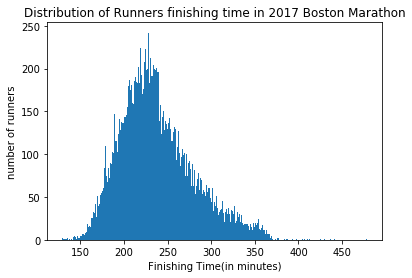

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.hist(df_full.loc[df_full.Year=='2017','Official'], bins = 500)

ax.set_title('Distribution of Runners finishing time in 2017 Boston Marathon')
ax.set_xlabel('Finishing Time(in minutes)')
ax.set_ylabel('number of runners')

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

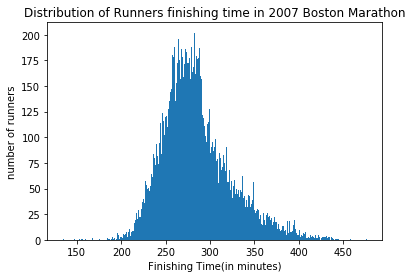

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.hist(df_full.loc[df_full.Year=='2007','Official'], bins = 500)

ax.set_title('Distribution of Runners finishing time in 2007 Boston Marathon')
ax.set_xlabel('Finishing Time(in minutes)')
ax.set_ylabel('number of runners')

ax.set_xticklabels(range(100, 500,50))

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 